In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
%matplotlib notebook

In [8]:
import pyecharts

In [9]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [49]:
df = pd.read_csv('vgsales.csv')

In [50]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [53]:
#Display that in both 2017 and 2020, the published game data are too insignificant to be considered
print(df.loc[df.Year == 2017])
print(df.loc[df.Year == 2020])

        Rank                                              Name Platform  \
14390  14393  Phantasy Star Online 2 Episode 4: Deluxe Package      PS4   
16241  16244  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV   
16438  16441                  Brothers Conflict: Precious Baby      PSV   

         Year         Genre     Publisher  NA_Sales  EU_Sales  JP_Sales  \
14390  2017.0  Role-Playing          Sega       0.0       0.0      0.03   
16241  2017.0  Role-Playing          Sega       0.0       0.0      0.01   
16438  2017.0        Action  Idea Factory       0.0       0.0      0.01   

       Other_Sales  Global_Sales  
14390          0.0          0.03  
16241          0.0          0.01  
16438          0.0          0.01  
      Rank                    Name Platform    Year       Genre Publisher  \
5957  5959  Imagine: Makeup Artist       DS  2020.0  Simulation   Ubisoft   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
5957      0.27       0.0       0.0     

In [54]:
# get the shape of the data, no data on 2018, 2019, but only one game in 2020, 
# therefore we delete it from our dataframe
df = df[(df.Year != 2020) & (df.Year != 2017)]

In [55]:
#get the column names of the data
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16594 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16594 non-null  int64  
 1   Name          16594 non-null  object 
 2   Platform      16594 non-null  object 
 3   Year          16323 non-null  float64
 4   Genre         16594 non-null  object 
 5   Publisher     16536 non-null  object 
 6   NA_Sales      16594 non-null  float64
 7   EU_Sales      16594 non-null  float64
 8   JP_Sales      16594 non-null  float64
 9   Other_Sales   16594 non-null  float64
 10  Global_Sales  16594 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [59]:
# data cleaning
sales = df.copy()

In [60]:
sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [61]:
#find the total number of missing values 
sales.isna().sum().sum()

329

In [62]:
#drop the rows with missing values 
sales.replace("nan", np.nan, inplace=True)
sales = sales.dropna()
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [63]:
sales.shape

(16287, 11)

In [64]:
# Convert data type
sales['Year'] = sales['Year'].astype('int32', errors='ignore')
sales.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983], dtype=int32)

In [65]:
df.to_csv('cleaned_data.csv', index=False)


Market

In [66]:
# Data Preparation: Summing up global sales by year
year_sales_glo = df.loc[:, ['Name', 'Year', 'Global_Sales']].groupby(by =  'Year').sum()

print(year_sales_glo.index)
# Plot Creation: Creating a scatter plot for global sales over the years
fig5 = go.Scatter(x = year_sales_glo.index, y = year_sales_glo['Global_Sales'],
                  name = "Global Sales",
                  line_shape='linear')

# Storing the plot in a list (useful if you want to combine multiple plots)
figs = [fig5]

# Setting up the layout for the plot
layout = dict(title = 'Global Video Game Sales Trend',
              xaxis= dict(title= 'Year'),
              yaxis= dict(title= 'Total Sales (Millions USD)')
             )

# Combining the plot and layout into a single figure dictionary
figure = dict(data = figs, layout = layout)

# Displaying the plot
iplot(figure)


Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
       1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,
       1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
       2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0],
      dtype='float64', name='Year')


In [67]:
# Create DataFrame year_sales to summarize sales data by year
year_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Year').sum()

# Create four line plot objects representing sales trends in different regions
fig1 = go.Scatter(x=year_sales.index, y=year_sales['NA_Sales'],
                  name="North American Sales Revenue",
                  line_shape='vh'
                  )
fig2 = go.Scatter(x=year_sales.index, y=year_sales['EU_Sales'],
                  name="Europe Sales Revenue",
                  line_shape='vh')
fig3 = go.Scatter(x=year_sales.index, y=year_sales['JP_Sales'],
                  name="Japan Sales Revenue",
                  line_shape='vh')
fig4 = go.Scatter(x=year_sales.index, y=year_sales['Other_Sales'],
                  name="Other Regions Sales Revenue",
                  line_shape='vh')

# Place the four line plot objects in a list
figs = [fig1, fig2, fig3, fig4]

# Create layout for the plot
layout = dict(title='Regional Sales Trends',
              xaxis=dict(title='Year'),
              yaxis=dict(title='Sales Revenue (million dollars)')
              )

# Create the plot object
figure = dict(data=figs, layout=layout)

# Display the plot in the Notebook
iplot(figure)


Publisher

In [68]:
# Extract data for the top ten publishers
top_publishers = df['Publisher'].value_counts().head(10)

# Create a pie chart object Pie
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='550px'))

# Add data to the pie chart
pie1.add('', 
         [list(z) for z in zip(top_publishers.index.tolist(), top_publishers.tolist())], 
         radius=['35%', '60%'])

# Set the global configuration of the graph
pie1.set_global_opts(title_opts=opts.TitleOpts(title='Top Ten Publishers Globally from 2020 to 2015'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))

# Set the series configuration of the pie chart
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))

# Display the pie chart in the notebook
pie1.render_notebook()


NameError: name 'Pie' is not defined

<IPython.core.display.Javascript object>


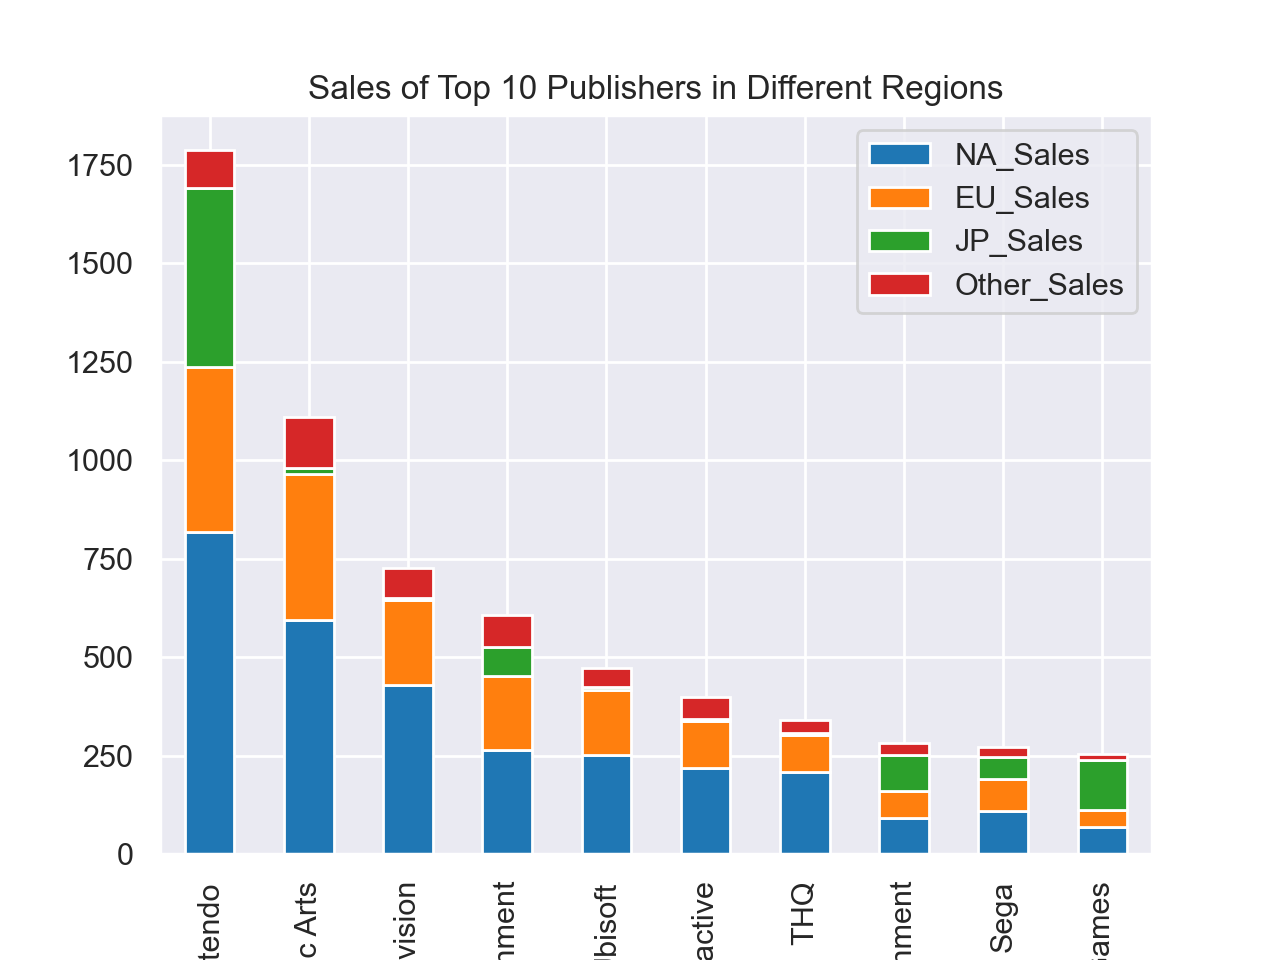

In [70]:
# Define colors with lower saturation
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Calculate total sales for each publisher across different regions
Pub_COUNT = df.groupby('Publisher').agg({'NA_Sales':'sum', 'JP_Sales':'sum', 'EU_Sales':'sum', 'Other_Sales':'sum'}).reset_index().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'], ascending=False)

# Calculate total sales for each publisher
Pub_COUNT['Total'] = Pub_COUNT['NA_Sales'] + Pub_COUNT['EU_Sales'] + Pub_COUNT['JP_Sales'] + Pub_COUNT['Other_Sales']

# Sort the data by total sales
Pub_COUNT.sort_values(by='Total', inplace=True, ascending=False)

# Select the top 10 publishers
top_10_publishers = Pub_COUNT.head(10)

# Plot a stacked bar chart to visualize sales of the top 10 publishers in each region
top_10_publishers.plot.bar(x='Publisher', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                           color=colors, stacked=True, 
                           title='Sales of Top 10 Publishers in Different Regions')

plt.show()




<IPython.core.display.Javascript object>


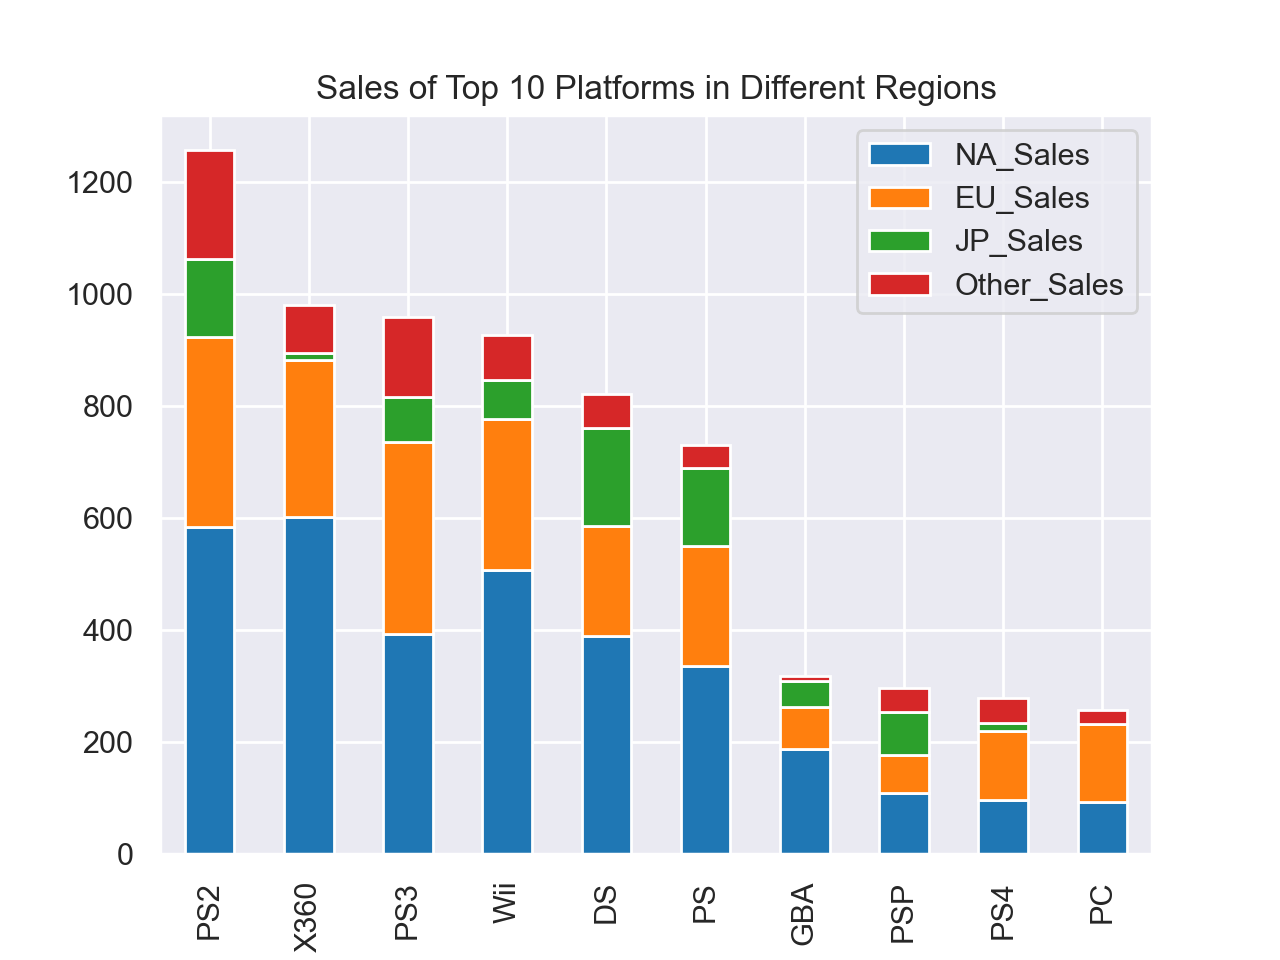

In [71]:
# Calculate total sales for each platform across different regions
Plat_COUNT = df.groupby('Platform').agg({'NA_Sales':'sum', 'JP_Sales':'sum', 'EU_Sales':'sum', 'Other_Sales':'sum'}).reset_index().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'], ascending=False)

# Calculate total sales for each platform
Plat_COUNT['Total'] = Plat_COUNT['NA_Sales'] + Plat_COUNT['EU_Sales'] + Plat_COUNT['JP_Sales'] + Plat_COUNT['Other_Sales']

# Sort the data by total sales
Plat_COUNT.sort_values(by='Total', inplace=True, ascending=False)

# Select the top 10 platforms
top_10_platforms = Plat_COUNT.head(10)

# Plot a stacked bar chart to visualize sales of the top 10 platforms in different regions
top_10_platforms.plot.bar(x='Platform', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                          color=colors, stacked=True, 
                          title='Sales of Top 10 Platforms in Different Regions')

plt.show()


<IPython.core.display.Javascript object>


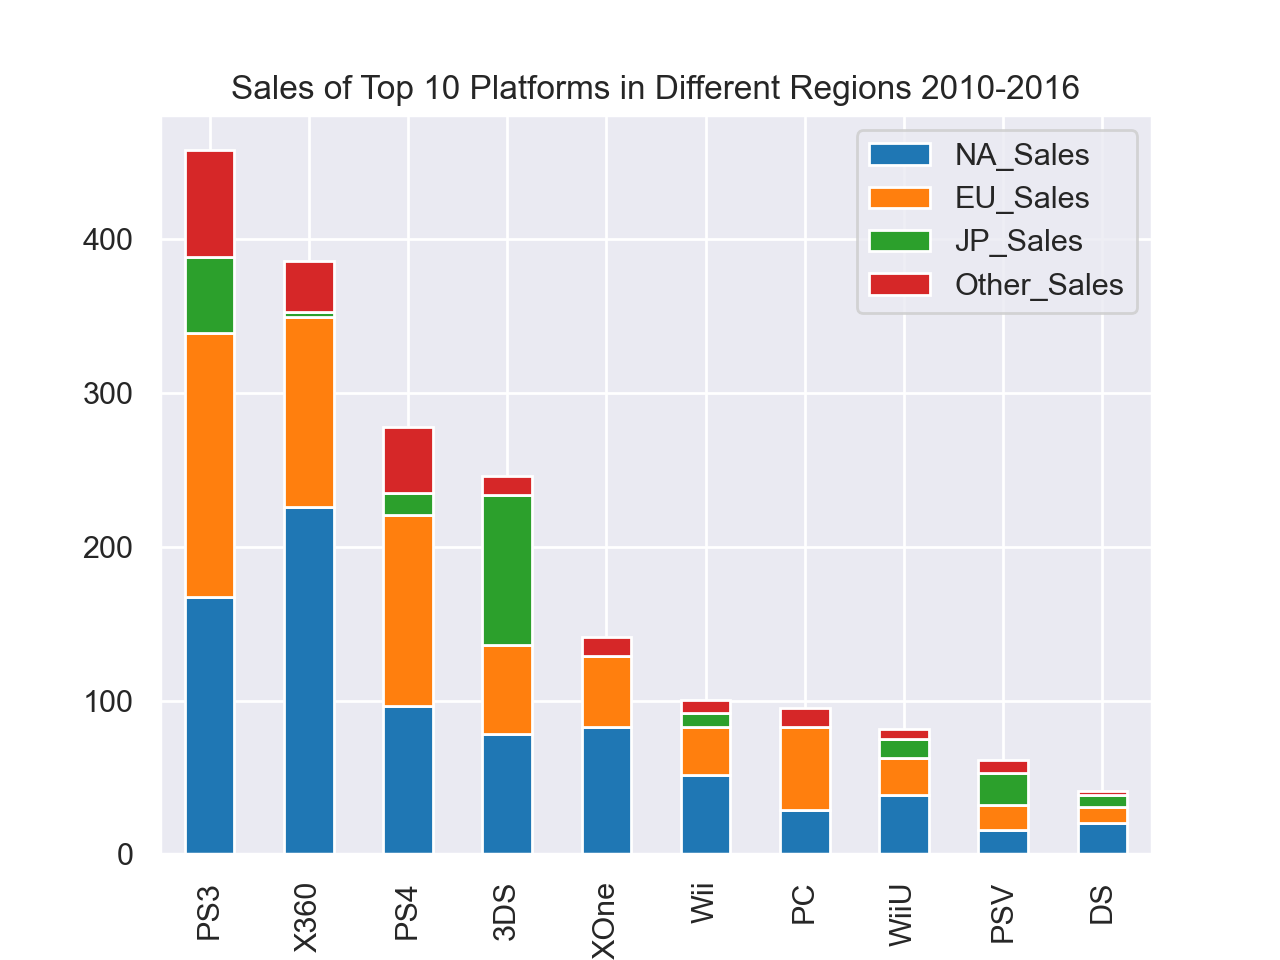

In [75]:
# Calculate total sales for each platform across different regions after 2010
# This extra block is dedicated to visualize the more recent platforms of game release
# In essense, no new games would be published on old platforms, and it can be seen that PS2 is no longer in the market
# after 2010
Plat_COUNT_2010 = df[df.Year > 2010].groupby('Platform').agg({'NA_Sales':'sum', 'JP_Sales':'sum', 'EU_Sales':'sum', 'Other_Sales':'sum'}).reset_index().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'], ascending=False)

# Calculate total sales for each platform
Plat_COUNT_2010['Total'] = Plat_COUNT_2010['NA_Sales'] + Plat_COUNT_2010['EU_Sales'] + Plat_COUNT_2010['JP_Sales'] + Plat_COUNT_2010['Other_Sales']

# Sort the data by total sales
Plat_COUNT_2010.sort_values(by='Total', inplace=True, ascending=False)

# Select the top 10 platforms
top_10_platforms_2010 = Plat_COUNT_2010.head(10)

# Plot a stacked bar chart to visualize sales of the top 10 platforms in different regions
top_10_platforms_2010.plot.bar(x='Platform', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                          color=colors, stacked=True, 
                          title='Sales of Top 10 Platforms in Different Regions 2010-2016')

plt.show()

Player

<IPython.core.display.Javascript object>


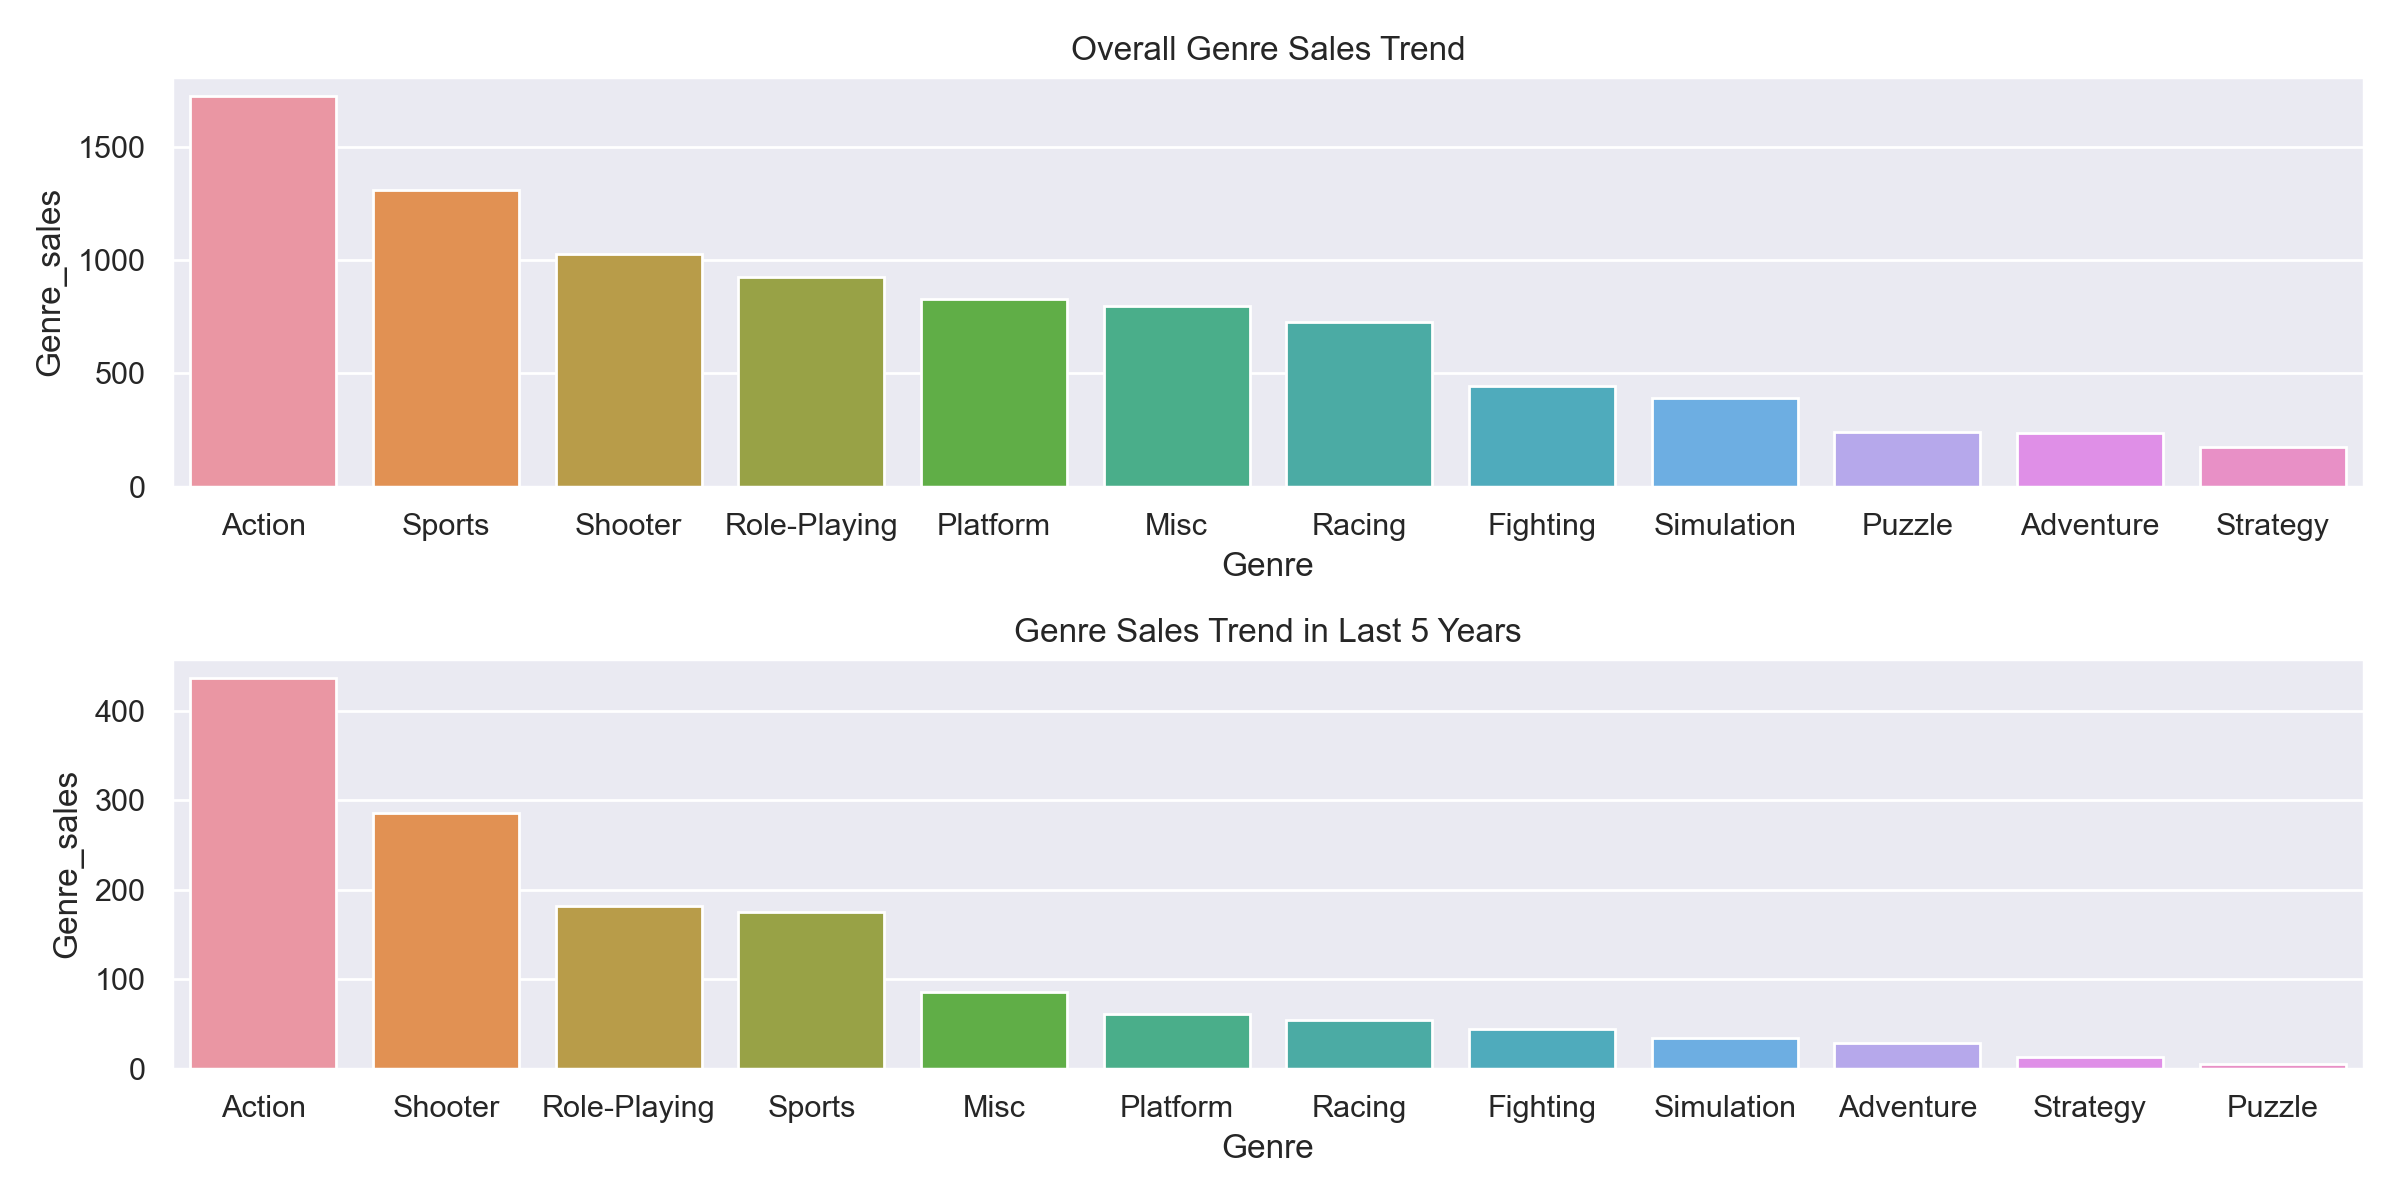

In [76]:
# Calculate the total global sales for each genre aggregated over the years
FGE = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FGE = pd.DataFrame(data=FGE, columns=['Genre_sales'])  # Pass list instead of set

# Calculate the total global sales for each genre aggregated over the last five years
FGE_near5 = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_near5 = pd.DataFrame(data=FGE_near5, columns=['Genre_sales'])  # Pass list instead of set

# Create subplots for two bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the overall sales trend for each genre
sns.barplot(x=FGE.index, y='Genre_sales', data=FGE, ax=ax1)
ax1.set_title('Overall Genre Sales Trend')

# Plot the sales trend in the last five years for each genre
sns.barplot(x=FGE_near5.index, y='Genre_sales', data=FGE_near5, ax=ax2)
ax2.set_title('Genre Sales Trend in Last 5 Years')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


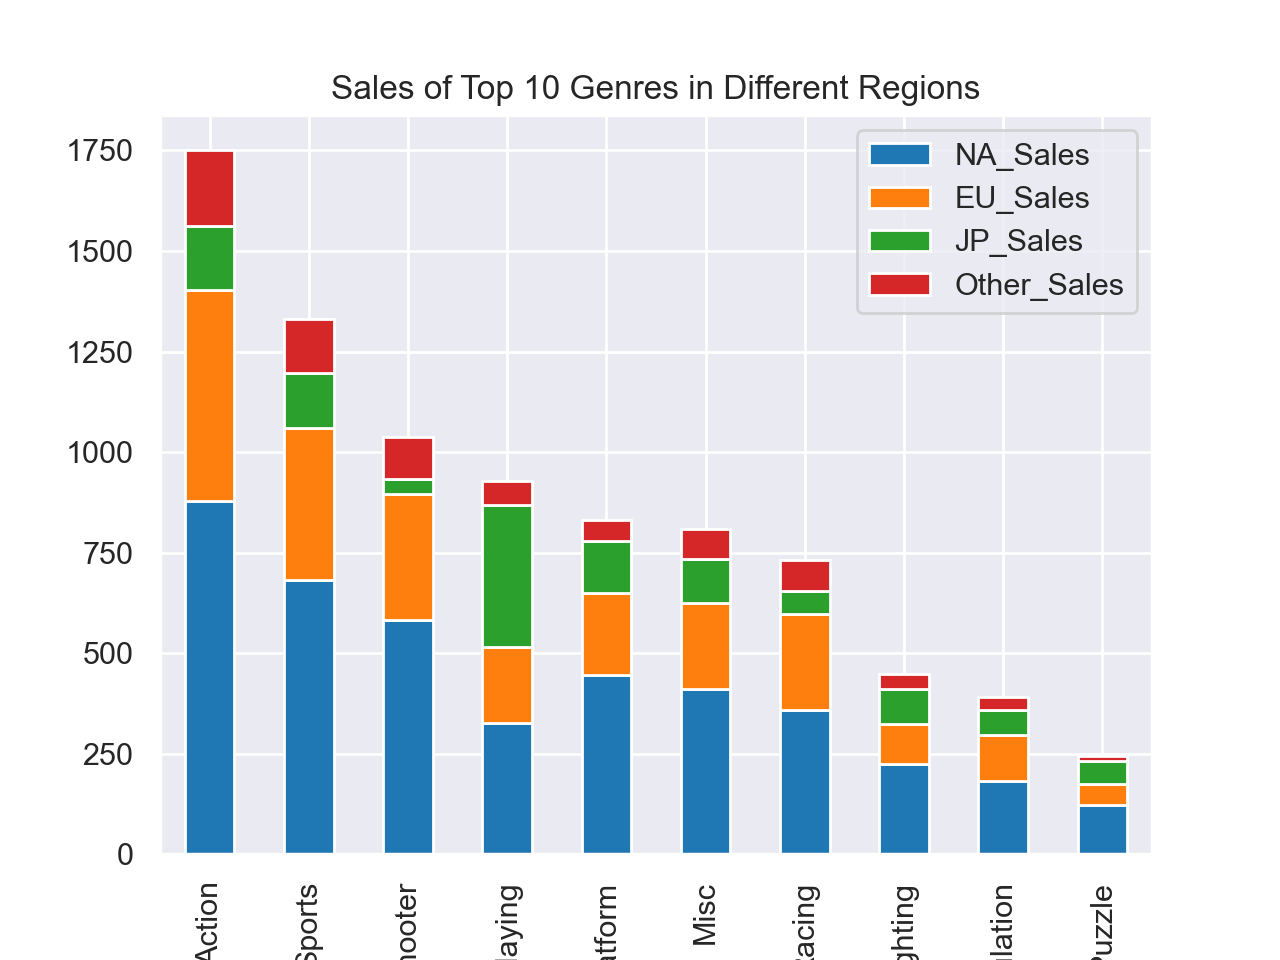

In [77]:
# Calculate total sales for each genre across different regions
Gen_COUNT = df.groupby('Genre').agg({'NA_Sales':'sum', 'JP_Sales':'sum', 'EU_Sales':'sum', 'Other_Sales':'sum'}).reset_index().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'], ascending=False)

# Calculate total sales for each genre
Gen_COUNT['Total'] = Gen_COUNT['NA_Sales'] + Gen_COUNT['EU_Sales'] + Gen_COUNT['JP_Sales'] + Gen_COUNT['Other_Sales']

# Sort the data by total sales
Gen_COUNT.sort_values(by='Total', inplace=True, ascending=False)

# Select the top 10 genres
top_10_genres = Gen_COUNT.head(10)

# Plot a stacked bar chart to visualize sales of the top 10 genres in different regions
top_10_genres.plot.bar(x='Genre', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                       color=colors, stacked=True, 
                       title='Sales of Top 10 Genres in Different Regions')

plt.show()


<IPython.core.display.Javascript object>


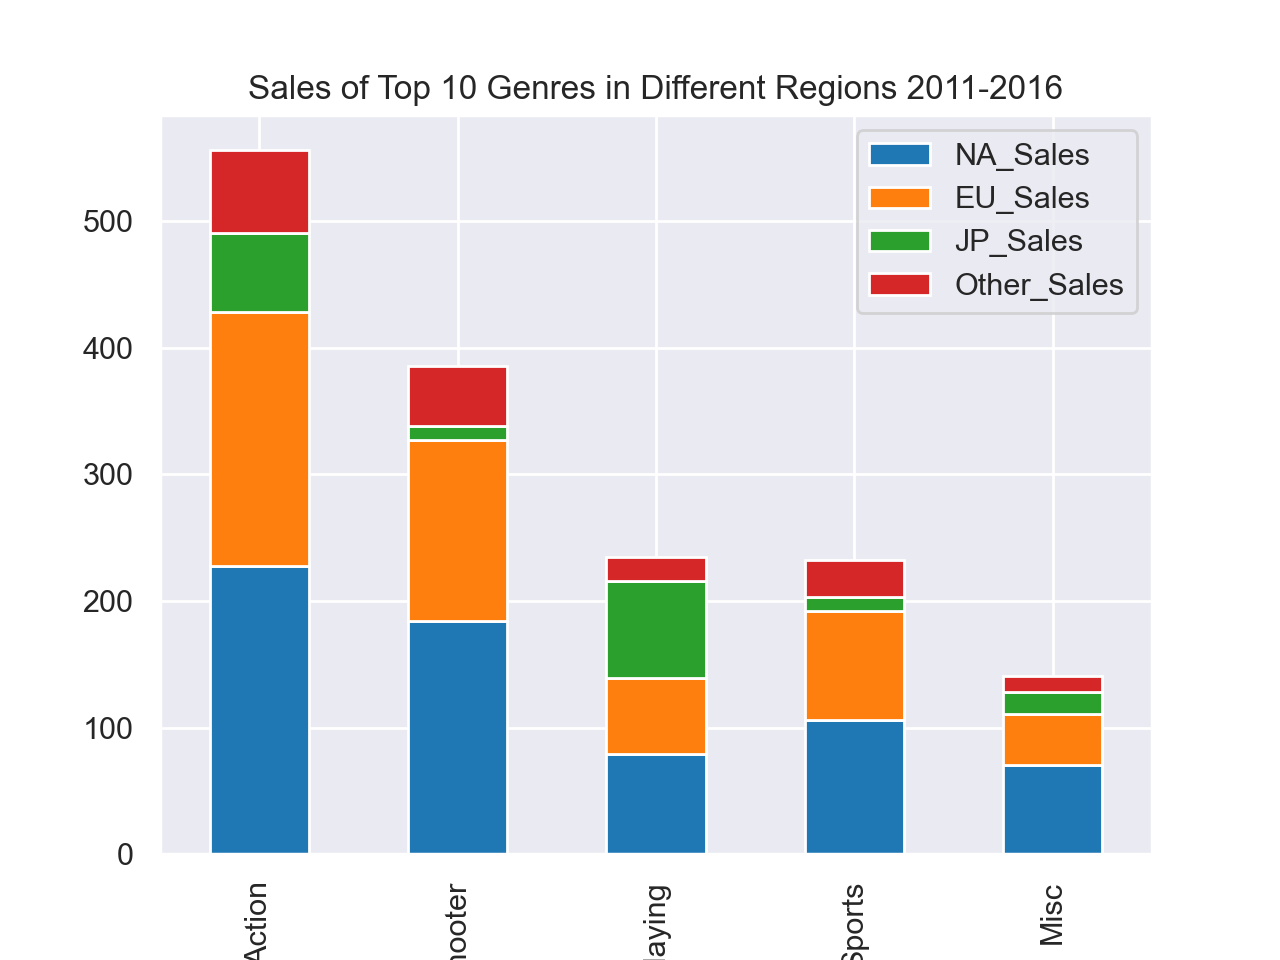

In [80]:
# Calculate total sales for each genre across different regions
Gen_COUNT_2010 = df[df.Year > 2010].groupby('Genre').agg({'NA_Sales':'sum', 'JP_Sales':'sum', 'EU_Sales':'sum', 'Other_Sales':'sum'}).reset_index().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'], ascending=False)

# Calculate total sales for each genre
Gen_COUNT_2010['Total'] = Gen_COUNT_2010['NA_Sales'] + Gen_COUNT_2010['EU_Sales'] + Gen_COUNT_2010['JP_Sales'] + Gen_COUNT_2010['Other_Sales']

# Sort the data by total sales
Gen_COUNT_2010.sort_values(by='Total', inplace=True, ascending=False)

# Select the top 10 genres
top_10_genres_2010 = Gen_COUNT_2010.head(5)

# Plot a stacked bar chart to visualize sales of the top 10 genres in different regions
top_10_genres_2010.plot.bar(x='Genre', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                       color=colors, stacked=True, 
                       title='Sales of Top 10 Genres in Different Regions 2011-2016')

plt.show()

<IPython.core.display.Javascript object>


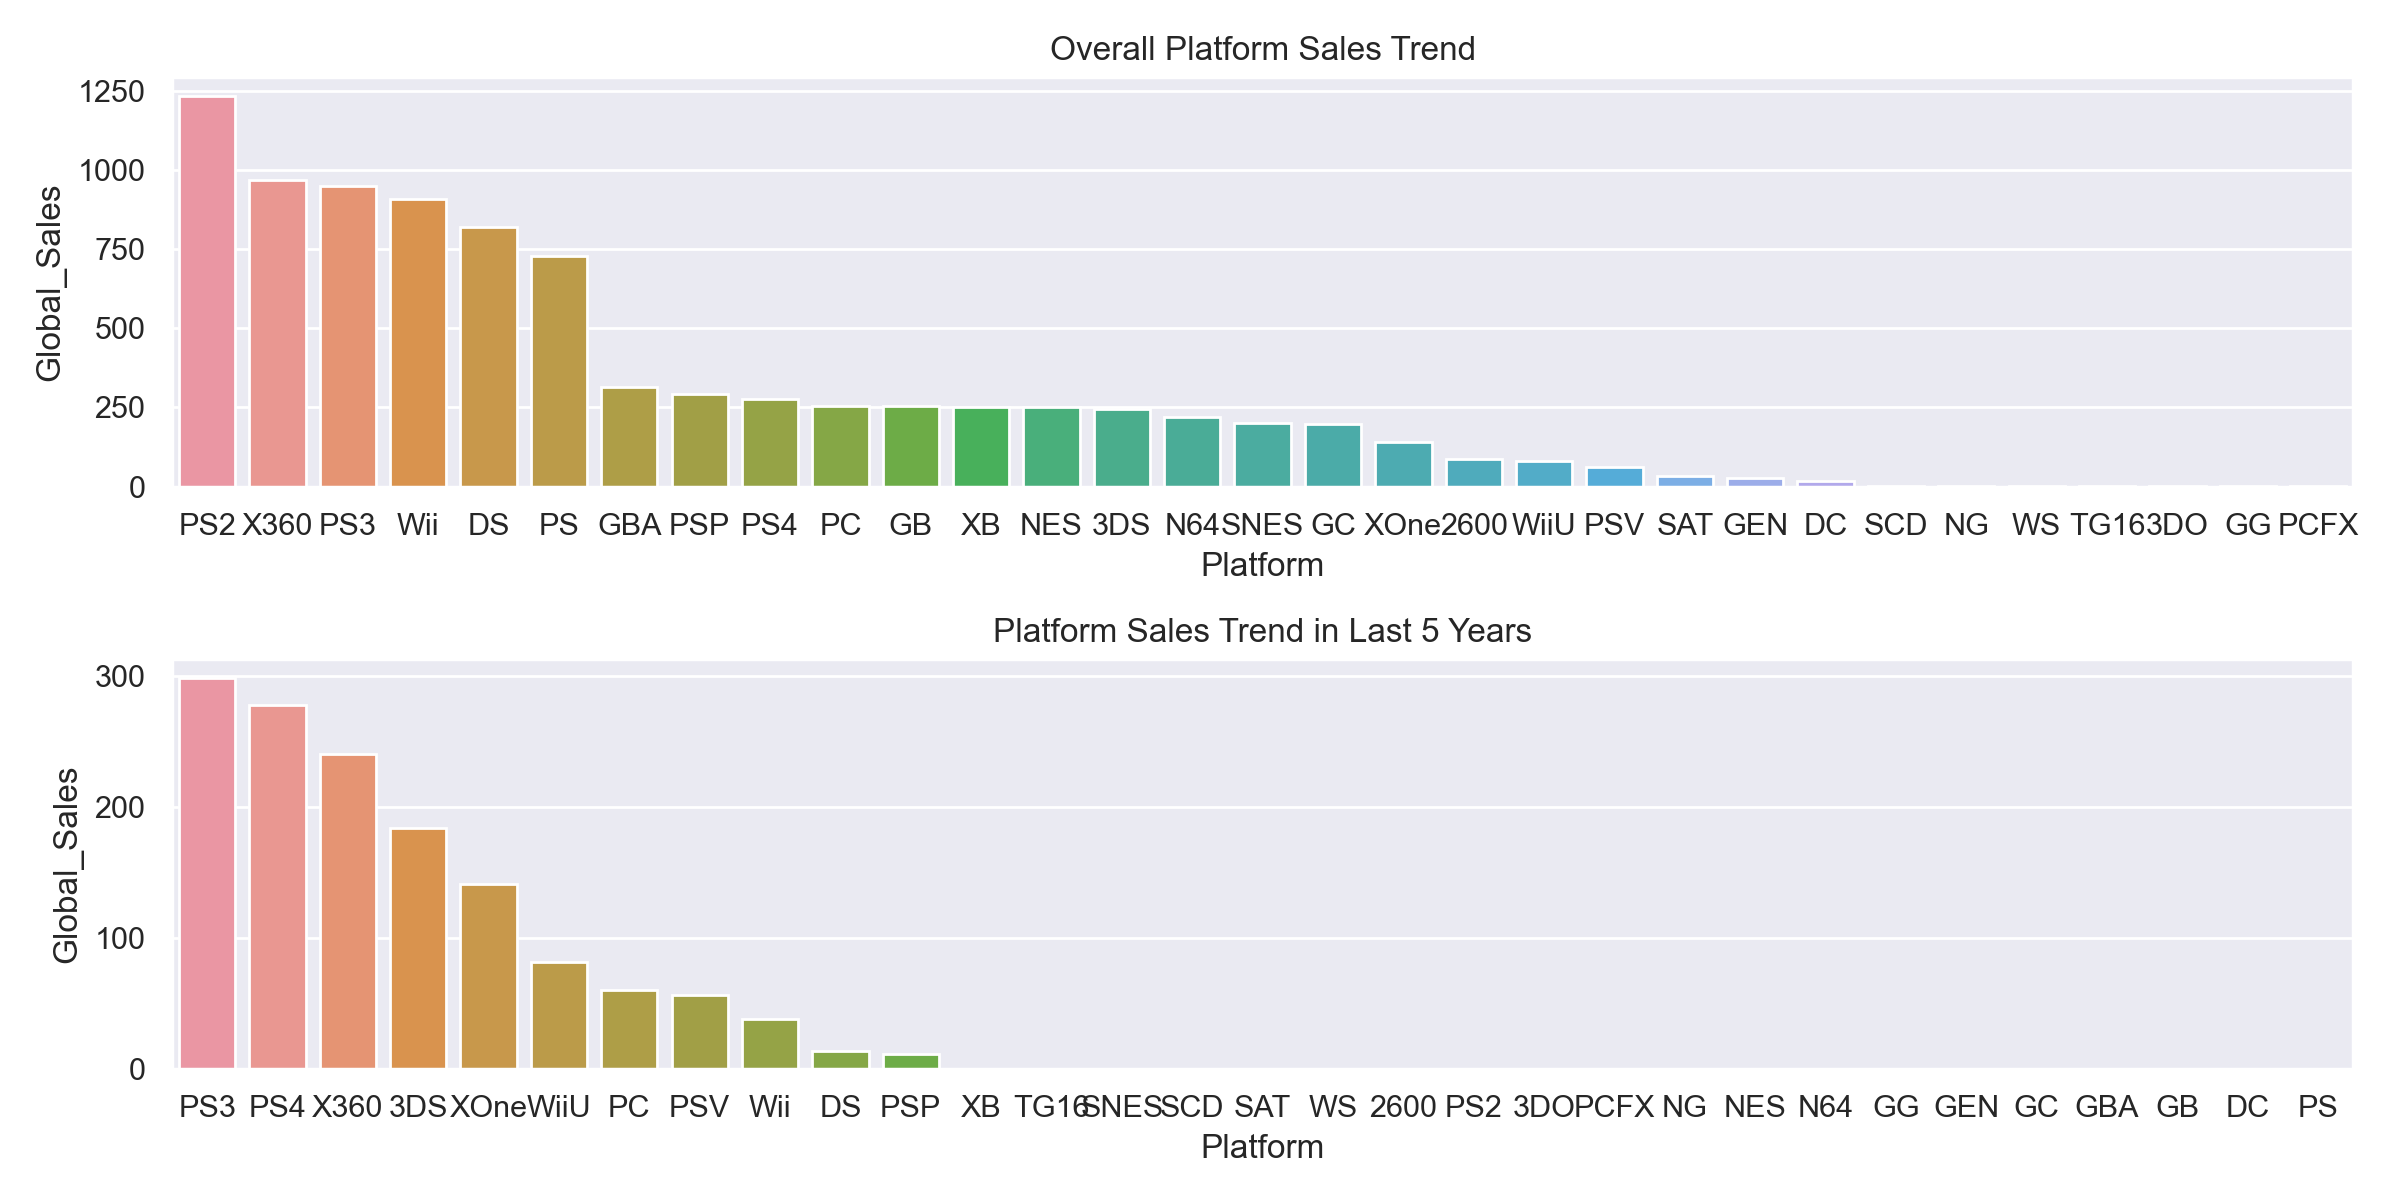

In [79]:
# Calculate the total global sales for each platform aggregated over the years
FPF = pd.pivot_table(df, index='Year', columns='Platform', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FPF = pd.DataFrame(data=FPF, columns=['Global_Sales'])  # Pass list instead of set

# Calculate the total global sales for each platform aggregated over the last five years
FPF_near5 = pd.pivot_table(df, index='Year', columns='Platform', values='Global_Sales', aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FPF_near5 = pd.DataFrame(data=FPF_near5, columns=['Global_Sales'])  # Pass list instead of set

# Create subplots for two bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the overall sales trend for each platform
sns.barplot(x=FPF.index, y='Global_Sales', data=FPF, ax=ax1)
ax1.set_title('Overall Platform Sales Trend')

# Plot the sales trend in the last five years for each platform
sns.barplot(x=FPF_near5.index, y='Global_Sales', data=FPF_near5, ax=ax2)
ax2.set_title('Platform Sales Trend in Last 5 Years')

plt.tight_layout()
plt.show()
